In [1]:
try:
    passes += 1
except NameError:
    %cd ..
    passes = 1

c:\Users\susanne\git\binarybeech


In [2]:
import pandas as pd
import numpy as np
import binarybeech.binarybeech as bb
import binarybeech.plot as plot
import logging

logging.basicConfig(level=logging.INFO)

Iris dataset
==

In [3]:
df_iris = pd.read_csv("data/iris.csv")

In [4]:
df_iris.columns
X_names = ["petal_length", "petal_width"]
df_iris[X_names]

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [5]:
c_iris = bb.CART(df=df_iris, y_name="species", metrics_type="classification")
c_iris.create_tree()

A tree with 12 leafs was created


In [6]:
c_iris.tree.traverse(df_iris.iloc[0]).value

'setosa'

In [7]:
c_iris.tree.root.branches[0].pinfo

{'N': 50, 'r': 0.0, 'R': 0.0}

In [8]:
c_iris.prune()

{'alpha': [0,
  0.0022222222222222205,
  0.006666666666666657,
  0.006666666666666668,
  0.006666666666666676,
  0.006666666666666677,
  0.2866666666666666],
 'R': [0.006666666666666662,
  0.013333333333333319,
  0.026666666666666655,
  0.03333333333333333,
  0.04666666666666668,
  0.3333333333333333,
  0.6666666666666667],
 'n_leafs': [9, 8, 6, 5, 3, 2, 1]}

In [9]:
c_iris.create_tree()
c_iris.prune(alpha_max=2e-3)

A tree with 12 leafs was created


{'alpha': [0], 'R': [0.006666666666666662], 'n_leafs': [9]}

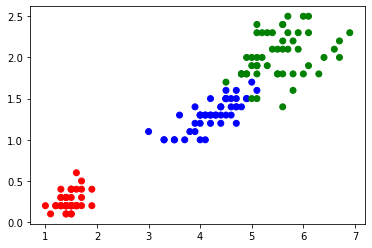

In [10]:
import matplotlib.pyplot as plt

colors = {"setosa": "red", "versicolor": "blue", "virginica": "green"}
plt.scatter(
    df_iris["petal_length"], df_iris["petal_width"], c=df_iris["species"].map(colors)
)

In [11]:
x, y = np.meshgrid(np.linspace(1, 7, 11), np.linspace(0, 2.5, 11))
col = []
for i in range(len(x.ravel())):
    d = df_iris.iloc[120].copy()
    d["petal_length"] = x.ravel()[i]
    d["petal_width"] = y.ravel()[i]
    col.append(c_iris.tree.traverse(d).value)
for i in range(len(col)):
    if col[i] == "setosa":
        col[i] = 0
    if col[i] == "versicolor":
        col[i] = 1
    if col[i] == "virginica":
        col[i] = 2
z = np.array(col).reshape(x.shape)

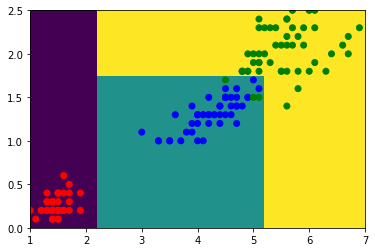

In [12]:
fig, ax = plt.subplots()
ax.pcolormesh(x, y, z)
ax.scatter(
    df_iris["petal_length"], df_iris["petal_width"], c=df_iris["species"].map(colors)
)

In [13]:
c_iris.validate()

{'precision': array([1.  , 0.98, 1.  ]),
 'recall': array([1.        , 1.        , 0.98039216]),
 'F-score': 0.9933326665999934,
 'accuracy': 0.9933333333333333}

In [14]:
%%timeit
c_iris.train()

A tree with 12 leafs was created
A tree with 8 leafs was created
A tree with 7 leafs was created
A tree with 10 leafs was created
A tree with 10 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.006666666666666676


A tree with 11 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 9 leafs was created
A tree with 13 leafs was created
A tree with 11 leafs was created
A tree with 7 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.0038490017945975005


A tree with 9 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 10 leafs was created
A tree with 10 leafs was created
A tree with 10 leafs was created
A tree with 7 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.006666666666666676


A tree with 10 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 7 leafs was created
A tree with 9 leafs was created
A tree with 10 leafs was created
A tree with 10 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.006666666666666676


A tree with 6 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 6 leafs was created
A tree with 9 leafs was created
A tree with 9 leafs was created
A tree with 11 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.006666666666666676


A tree with 13 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 10 leafs was created
A tree with 6 leafs was created
A tree with 10 leafs was created
A tree with 14 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.006666666666666662


A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 8 leafs was created
A tree with 10 leafs was created
A tree with 10 leafs was created
A tree with 12 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.0038490017945975005


A tree with 8 leafs was created
A tree with 12 leafs was created
A tree with 12 leafs was created
A tree with 7 leafs was created
A tree with 11 leafs was created
A tree with 9 leafs was created
A tree with 10 leafs was created


INFO:binarybeech.binarybeech:beta_best: 0.006666666666666676


A tree with 9 leafs was created
A tree with 12 leafs was created
3.22 s ± 717 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


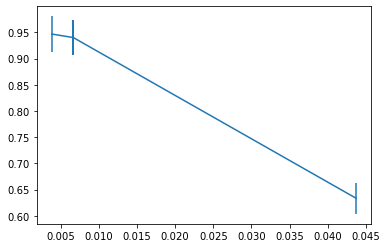

In [15]:
plot.plot_pruning_quality(**c_iris.pruning_quality)

In [16]:
import binarybeech.utils

binarybeech.utils.print_tree(c_iris.tree)

petal_length<2.16
├── False:petal_length<4.79
│   ├── False:virginica
│   └── True: versicolor
└── True: setosa



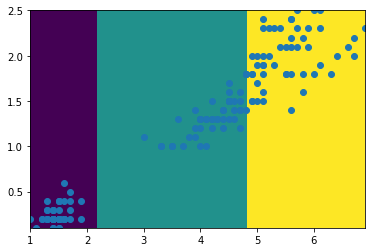

In [17]:
plot.plot_areas(c_iris, "petal_length", "petal_width", df=df_iris)

In [18]:
c_iris.validate()

{'precision': array([1.  , 0.88, 0.98]),
 'recall': array([1.        , 0.97777778, 0.89090909]),
 'F-score': 0.9532163742690059,
 'accuracy': 0.9533333333333334}